In [1]:
!curl "https://raw.githubusercontent.com/mahima-sharma10/MLAlgorithms-comparison/main/train.csv" > train.csv
!curl "https://raw.githubusercontent.com/mahima-sharma10/MLAlgorithms-comparison/main/test.csv" > test.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1473k  100 1473k    0     0  2031k      0 --:--:-- --:--:-- --:--:-- 2031k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  426k  100  426k    0     0  1061k      0 --:--:-- --:--:-- --:--:-- 1061k


In [2]:
import numpy as np
import pandas as pd
train_df  = pd.read_csv('train.csv')
train_df.head()

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0


In [3]:
len(train_df)

26496

In [4]:
#NO Null data
train_df.isnull().sum()

ID                         0
datetime                   0
temperature                0
var1                       0
pressure                   0
windspeed                  0
var2                       0
electricity_consumption    0
dtype: int64

In [5]:
print(train_df.columns)

Index(['ID', 'datetime', 'temperature', 'var1', 'pressure', 'windspeed',
       'var2', 'electricity_consumption'],
      dtype='object')


In [6]:
print(train_df.dtypes)

ID                           int64
datetime                    object
temperature                float64
var1                       float64
pressure                   float64
windspeed                  float64
var2                        object
electricity_consumption    float64
dtype: object


In [7]:
train_df['year'] =  pd.to_datetime(train_df['datetime']).dt.year
train_df['month'] =  pd.to_datetime(train_df['datetime']).dt.month
train_df['day'] =  pd.to_datetime(train_df['datetime']).dt.day
train_df['hour'] =  pd.to_datetime(train_df['datetime']).dt.hour

In [8]:
train_df

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption,year,month,day,hour
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0,2013,7,1,0
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0,2013,7,1,1
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0,2013,7,1,2
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0,2013,7,1,3
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0,2013,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
26491,34891,2017-06-23 19:00:00,-0.7,-15.0,1009.0,51.685,A,225.0,2017,6,23,19
26492,34892,2017-06-23 20:00:00,-2.9,-11.4,1005.0,56.105,A,213.0,2017,6,23,20
26493,34893,2017-06-23 21:00:00,-1.4,-12.9,995.0,61.275,A,213.0,2017,6,23,21
26494,34894,2017-06-23 22:00:00,-2.9,-11.4,996.0,67.210,A,210.0,2017,6,23,22


In [9]:
train_df["var2"].unique()

array(['A', 'B', 'C'], dtype=object)

In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

ohe.fit_transform(train_df[["var2"]]).toarray()
feature_array = ohe.fit_transform(train_df[["var2"]]).toarray()
ohe.categories_
feature_labels = ohe.categories_
np.array(feature_labels).ravel()
feature_labels = np.array(feature_labels).ravel()
pd.DataFrame(feature_array, columns = feature_labels)

features = pd.DataFrame(feature_array, columns = feature_labels)
print(features)
features.head()

         A    B    C
0      1.0  0.0  0.0
1      1.0  0.0  0.0
2      1.0  0.0  0.0
3      1.0  0.0  0.0
4      1.0  0.0  0.0
...    ...  ...  ...
26491  1.0  0.0  0.0
26492  1.0  0.0  0.0
26493  1.0  0.0  0.0
26494  1.0  0.0  0.0
26495  1.0  0.0  0.0

[26496 rows x 3 columns]


,A,B,C
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [11]:
trainX = pd.concat([train_df,features], axis=1)
trainX = trainX.drop(columns=['var2','datetime'])

In [12]:
trainX

,ID,temperature,var1,pressure,windspeed,electricity_consumption,year,month,day,hour,A,B,C
0,0,-11.4,-17.1,1003.0,571.910,216.0,2013,7,1,0,1.0,0.0,0.0
1,1,-12.1,-19.3,996.0,575.040,210.0,2013,7,1,1,1.0,0.0,0.0
2,2,-12.9,-20.0,1000.0,578.435,225.0,2013,7,1,2,1.0,0.0,0.0
3,3,-11.4,-17.1,995.0,582.580,216.0,2013,7,1,3,1.0,0.0,0.0
4,4,-11.4,-19.3,1005.0,586.600,222.0,2013,7,1,4,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26491,34891,-0.7,-15.0,1009.0,51.685,225.0,2017,6,23,19,1.0,0.0,0.0
26492,34892,-2.9,-11.4,1005.0,56.105,213.0,2017,6,23,20,1.0,0.0,0.0
26493,34893,-1.4,-12.9,995.0,61.275,213.0,2017,6,23,21,1.0,0.0,0.0
26494,34894,-2.9,-11.4,996.0,67.210,210.0,2017,6,23,22,1.0,0.0,0.0


In [13]:
print(len(trainX))
trainX.head()

26496


,ID,temperature,var1,pressure,windspeed,electricity_consumption,year,month,day,hour,A,B,C
0,0,-11.4,-17.1,1003.0,571.910,216.0,2013,7,1,0,1.0,0.0,0.0
1,1,-12.1,-19.3,996.0,575.040,210.0,2013,7,1,1,1.0,0.0,0.0
2,2,-12.9,-20.0,1000.0,578.435,225.0,2013,7,1,2,1.0,0.0,0.0
3,3,-11.4,-17.1,995.0,582.580,216.0,2013,7,1,3,1.0,0.0,0.0
4,4,-11.4,-19.3,1005.0,586.600,222.0,2013,7,1,4,1.0,0.0,0.0


In [14]:
trainX = trainX[['ID','year','month','day','hour','temperature','pressure','windspeed','var1','electricity_consumption','A','B','C']]
trainX.head()

,ID,year,month,day,hour,temperature,pressure,windspeed,var1,electricity_consumption,A,B,C
0,0,2013,7,1,0,-11.4,1003.0,571.910,-17.1,216.0,1.0,0.0,0.0
1,1,2013,7,1,1,-12.1,996.0,575.040,-19.3,210.0,1.0,0.0,0.0
2,2,2013,7,1,2,-12.9,1000.0,578.435,-20.0,225.0,1.0,0.0,0.0
3,3,2013,7,1,3,-11.4,995.0,582.580,-17.1,216.0,1.0,0.0,0.0
4,4,2013,7,1,4,-11.4,1005.0,586.600,-19.3,222.0,1.0,0.0,0.0


In [15]:
print(trainX.dtypes)

ID                           int64
year                         int64
month                        int64
day                          int64
hour                         int64
temperature                float64
pressure                   float64
windspeed                  float64
var1                       float64
electricity_consumption    float64
A                          float64
B                          float64
C                          float64
dtype: object


In [16]:
X= trainX[['ID','year','month','day','hour','temperature','pressure','windspeed','var1','A','B','C']]
y= trainX['electricity_consumption']
X.shape, y.shape

((26496, 12), (26496,))

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, val_train, val_test = train_test_split(X,y, test_size=0.2, train_size=0.8, shuffle=False)
X_train.shape,X_test.shape,val_train.shape,val_test.shape

((21196, 12), (5300, 12), (21196,), (5300,))

In [18]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
train = minmax.fit_transform(X_train)
test = minmax.fit_transform(X_test)

train.shape,test.shape

((21196, 12), (5300, 12))

Plots

In [19]:
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
%matplotlib inline
import seaborn as sns

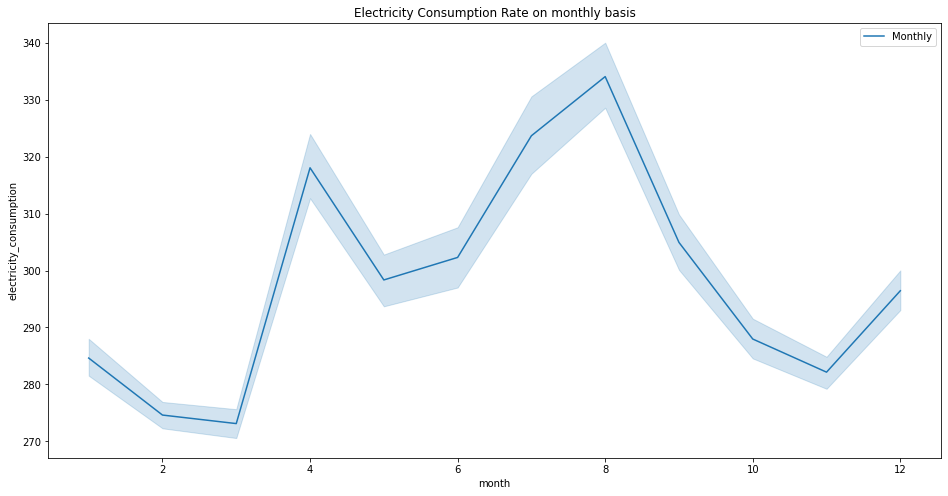

In [21]:
# Set the width and height of the figure
plt.figure(figsize=(16,8))
# Add title
plt.title("Electricity Consumption Rate on monthly basis")
# Line chart showing monthly trend
sns.lineplot(y=trainX['electricity_consumption'], x=trainX['month'], label="Monthly")

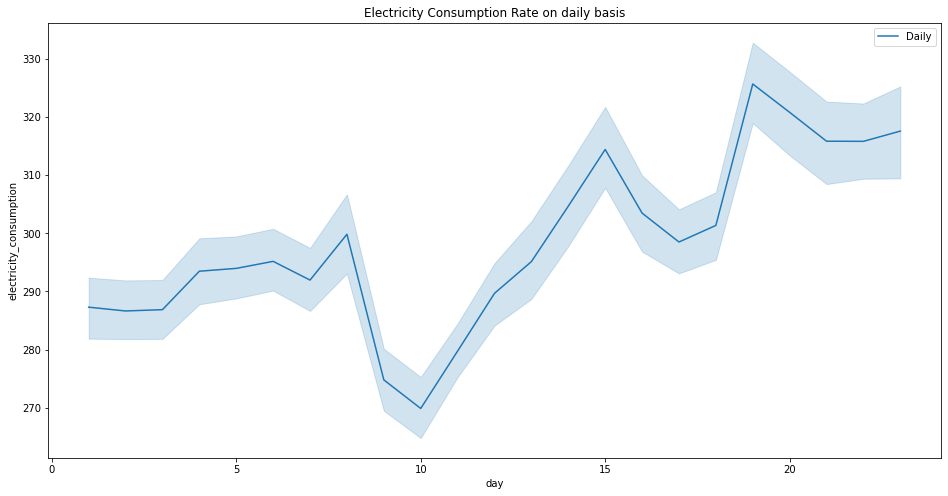

In [22]:
# Set the width and height of the figure
plt.figure(figsize=(16,8))
# Add title
plt.title("Electricity Consumption Rate on daily basis")
# Line chart showing daily trend
sns.lineplot(y=trainX['electricity_consumption'], x=trainX['day'], label="Daily")

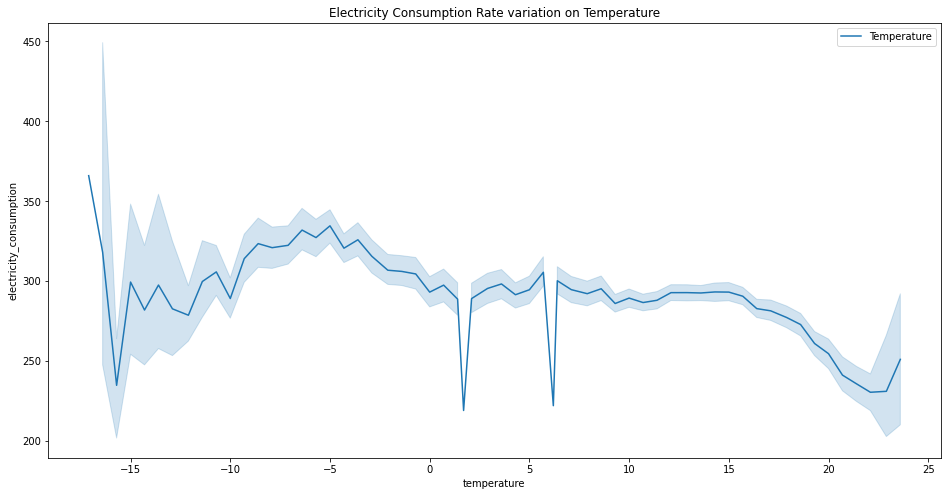

In [23]:
# Set the width and height of the figure
plt.figure(figsize=(16,8))
# Add title
plt.title("Electricity Consumption Rate variation on Temperature")
# Line chart showing temperature trend
sns.lineplot(y=trainX['electricity_consumption'], x=trainX['temperature'], label="Temperature")

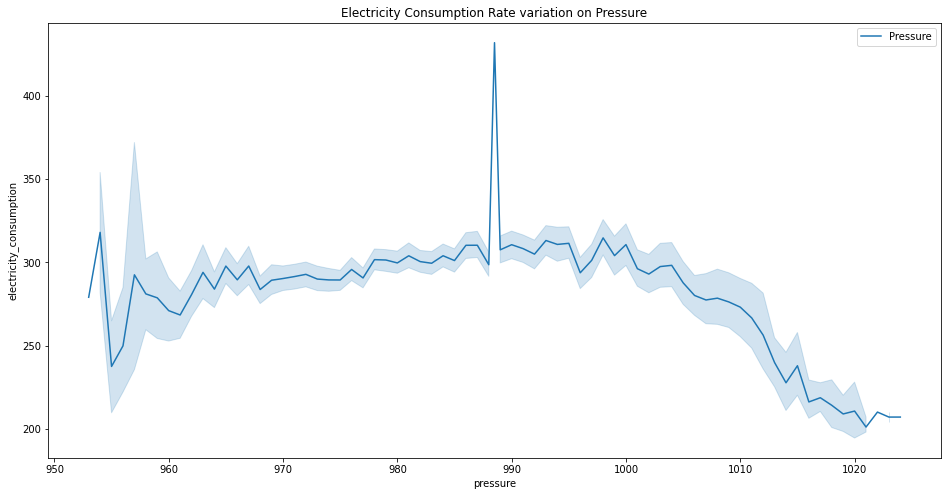

In [24]:
# Set the width and height of the figure
plt.figure(figsize=(16,8))
# Add title
plt.title("Electricity Consumption Rate variation on Pressure")
# Line chart showing pressure trend
sns.lineplot(y=trainX['electricity_consumption'], x=trainX['pressure'], label="Pressure")

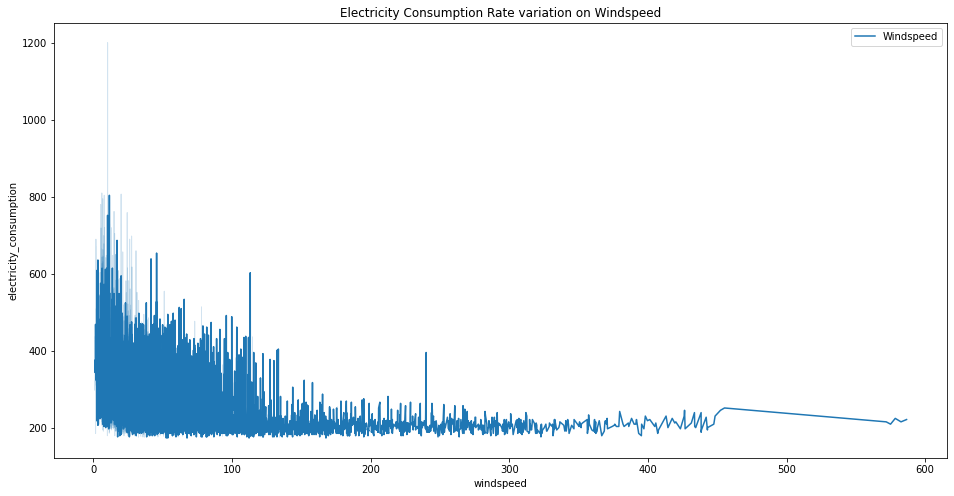

In [25]:
# Set the width and height of the figure
plt.figure(figsize=(16,8))
# Add title
plt.title("Electricity Consumption Rate variation on Windspeed")
# Line chart showing windspeed trend
sns.lineplot(y=trainX['electricity_consumption'], x=trainX['windspeed'], label="Windspeed")

ML models


1.   SVM (Support vector machine) Algorithm
2.   Random Forest



In [26]:
#svm
from sklearn import svm
from sklearn.svm import SVR

regressor = SVR(kernel = 'rbf', C=1, epsilon=10)
regressor.fit(train, val_train)
pred=regressor.predict(test)

In [27]:
#Random forest
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, max_features="auto")
rf_model.fit(train, val_train)

predictions = rf_model.predict(test)

Metrics

In [28]:
import math  
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from math import sqrt

mse_svm = mean_squared_error(pred, val_test, squared=False)
rmse_svm = math.sqrt(mse_svm)
mse_rf = mean_squared_error(predictions, val_test, squared=False)
rmse_rf = math.sqrt(mse_rf)
mae_svm = mean_absolute_error(pred, val_test)
mae_rf = mean_absolute_error(predictions, val_test)

print("mse_svm: ", mse_svm)
print("mse_rf: ", mse_rf)
print("rmse_svm: ", rmse_svm)
print("rmse_rf: ", rmse_rf)
print("mae_svm: ", mae_svm)
print("mae_rf: ", mae_rf)

# print('MAE: %f' % mae)
# print('MSE: %f' % mse)
# print('RMSE: %f' % sqrt(mse))

mse_svm:  85.48301603213541
mse_rf:  79.28792828552983
rmse_svm:  9.245702571039986
rmse_rf:  8.904376917310376
mae_svm:  58.321504979817604
mae_rf:  55.84112830188679
